In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

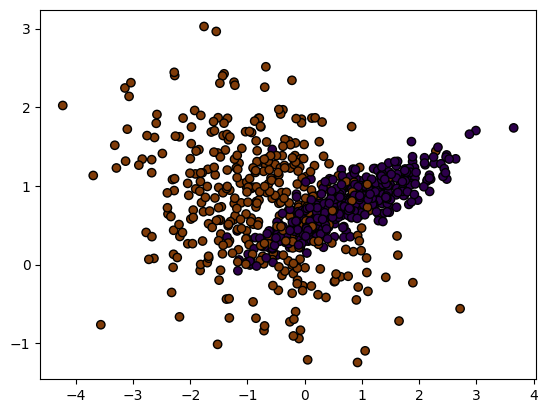

In [2]:

from sklearn.datasets import make_classification

# Generate 2D non-linearly separable data
X, y = make_classification(
    n_samples=800,       # number of points
    n_features=2,        # x, y coordinates
    n_informative=2,     # both features are informative
    n_redundant=0,       # no redundant features
    n_clusters_per_class=1,
    class_sep=0.8,       # separation between classes (lower = more overlap)
    random_state=42
)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuOr, edgecolors='k')
plt.show()


In [4]:
X.shape

(800, 2)

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [6]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2816 - loss: 0.8136 - val_accuracy: 0.2562 - val_loss: 0.7722
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2401 - loss: 0.7838 - val_accuracy: 0.2500 - val_loss: 0.7564
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2179 - loss: 0.7661 - val_accuracy: 0.2313 - val_loss: 0.7434
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2116 - loss: 0.7534 - val_accuracy: 0.2500 - val_loss: 0.7324
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2215 - loss: 0.7381 - val_accuracy: 0.2688 - val_loss: 0.7231
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2355 - loss: 0.7310 - val_accuracy: 0.3000 - val_loss: 0.7155
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2592 - loss: 0.7178 - val_accuracy: 0.3187 - val_loss: 0.7097
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3000 - loss: 0.7100 - val_accuracy: 0.3438 - 

In [9]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5361 - loss: 0.6493 - val_accuracy: 0.7563 - val_loss: 0.6201
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5878 - loss: 0.5868 - val_accuracy: 0.7750 - val_loss: 0.6040
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6367 - loss: 0.5770 - val_accuracy: 0.7812 - val_loss: 0.5887
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6462 - loss: 0.5817 - val_accuracy: 0.7875 - val_loss: 0.5750
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7504 - loss: 0.5210 - val_accuracy: 0.7937 - val_loss: 0.5633
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7708 - loss: 0.4989 - val_accuracy: 0.7937 - val_loss: 0.5526
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7899 - loss: 0.4720 - val_accuracy: 0.7875 - val_loss: 0.5425
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7855 - loss: 0.4601 - val_accuracy: 0.7875 -

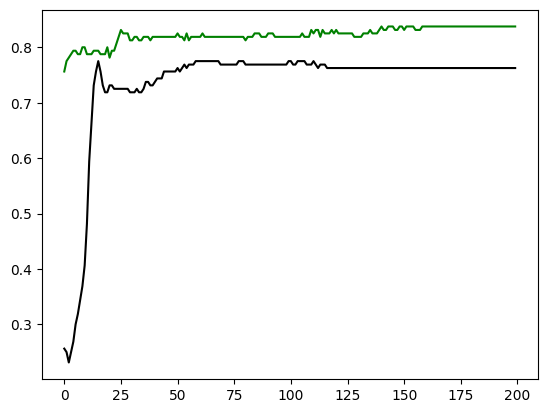

In [12]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')